**Bayes' Theorem**  
* P(A|B) = P(B|A)*P(A)/P(B)

**Example**  
* Machine 1: 30 wrenches/hour    
* Machine 2: 20 wrenches/hour  
* 1% of total produced is defective  
* Of all the defective parts: 50% came from machine 1 and 50% from machine 2  
* QUESTION:  What is the probability that a part produced by machine 2 is defective?

**Solution**  
* P(Machine1) = 60%  
* P(Machine2) = 40%  
* P(Defect) = 1%  
* P(Machine1|Defect) = P(Machine2|Defect) = 50%  
* QUESTION: P(Defective|Machine2) = ? = P(Machine2|Defective) * P(Defective)/P(Machine2) = .5 * .01 /.4 = .0125

**Naive Bayes Intuition**  
STEP 1:  
* P(Class1|X) = P(X|Class1) * P(Class1)  / P(X)  
* X represents the features associated with the observation you are predicting.  
* P(Class1) is your Prior Probability  - calculate that first.  
* P(X) is your Marginal Likelihood - calculate that second.  
* P(X|Class1) is your likelihood - calculate that third.  
* P(Class1|X) is your Posterior Probability - what you are ultimately trying to calculate - it is calculated last.  

STEP 2:  
* P(Class2|X) = P(X|Class2) * P(Class2)  / P(X)  
* X represents the features associated with the observation you are predicting.  
* P(Class2) is your Prior Probability  - calculate that first.  
* P(X) is your Marginal Likelihood - calculate that second.  
* P(X|Class2) is your likelihood - calculate that third.  
* P(Class2|X) is your Posterior Probability - what you are ultimately trying to calculate - it is calculated last.  
FINALLY:  
* P(Class1|X) vs P(Class2|X) is compared to finally classify.  

* How do we calculate P(X)?  
* For 2-D example - draw a circle around point X with selected radius.  
* Count all the points inside this circle - and these are ~ X.  
* Selected radius is going to affect results.  
* P(X) = Number of similar observations / Total Observations  
* Use this same circle (similarity) for P(X|Class1) and P(X|Class2)  
* Seems very similar to KNN?  Accounts for total by class - which KNN does not appear to?

**Why Naive?**  
* Need features to be independent - but they often are not.  
* P(X): Use a circle with selected radius to calculate.  Is a proxy for similarity.  Does not vary by class.  
* This means denominator is same in both values being compared - can skip that calculation when you are doing a comparison.  

* NOTE: Naive Bayes required target variable to be categorized as a factor.  Other algorithms did not.  

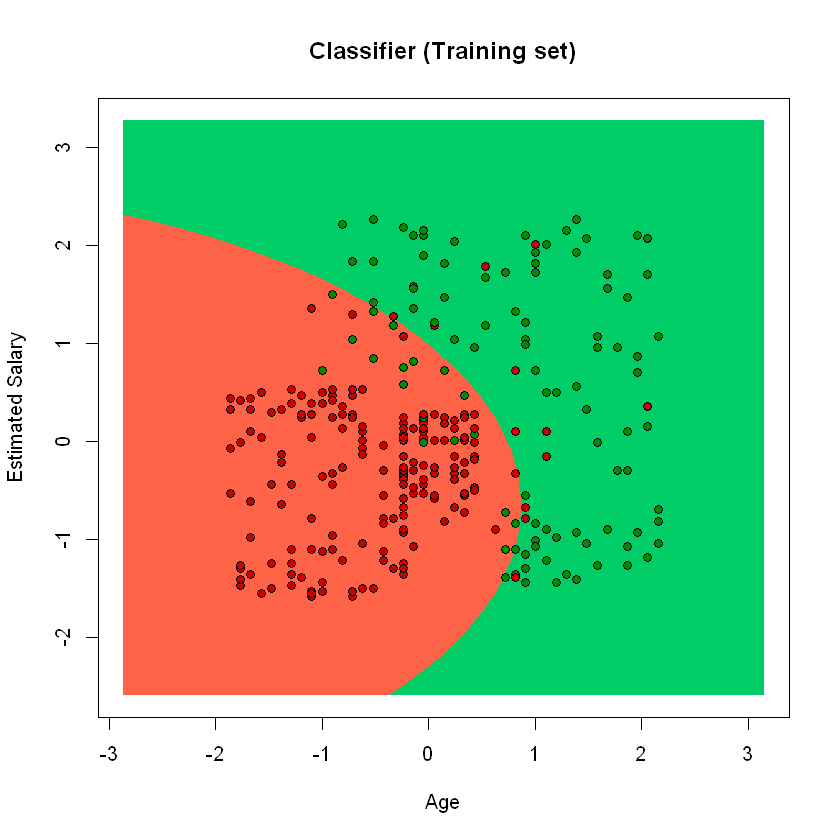

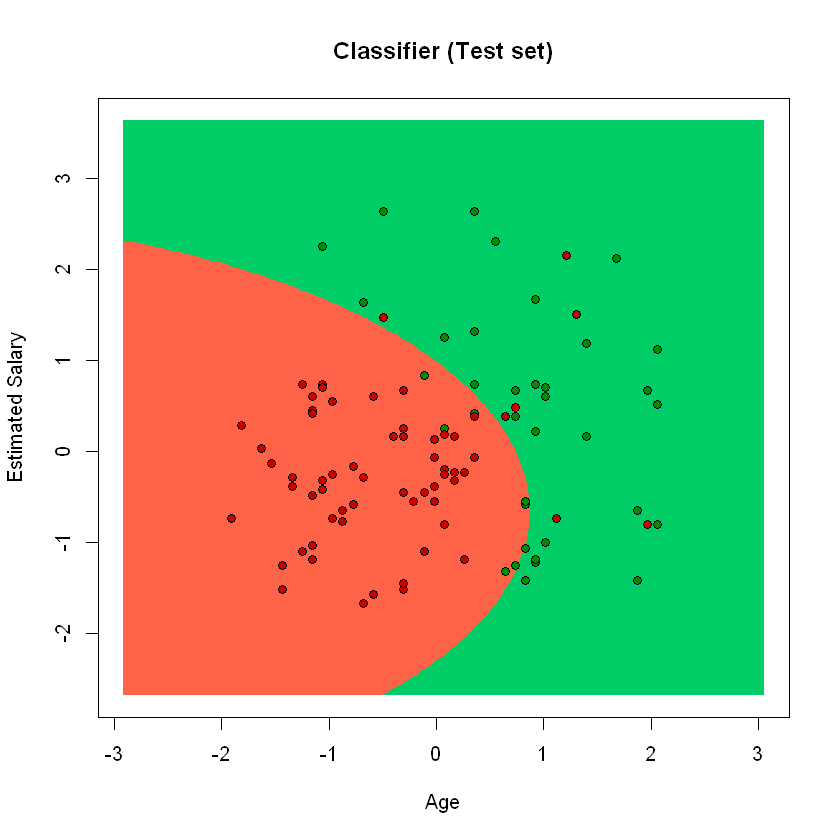

In [3]:
# Classification template

# Importing the dataset
dataset = read.csv('Social_Network_Ads.csv')
dataset = dataset[3:5]

# Encoding the target feature as factor
dataset$Purchased = factor(dataset$Purchased, levels = c(0, 1))

# Splitting the dataset into the Training set and Test set
# install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(dataset$Purchased, SplitRatio = 0.75)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

# Feature Scaling
training_set[-3] = scale(training_set[-3])
test_set[-3] = scale(test_set[-3])

# Fitting classifier to the Training set
library(e1071)
classifier <- naiveBayes(x = training_set[-3],
                        y = training_set$Purchased)

# Predicting the Test set results
y_pred = predict(classifier, newdata = test_set[-3])

# Making the Confusion Matrix
cm = table(test_set[, 3], y_pred)

# Visualising the Training set results
library(ElemStatLearn)
set = training_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3],
     main = 'Classifier (Training set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

# Visualising the Test set results
library(ElemStatLearn)
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3], main = 'Classifier (Test set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

* Smooth curve.  Similar to Kernel SVM.  
* Look at different shapes - which are linear - etc - among different classifiers.

In [4]:
cm

   y_pred
     0  1
  0 57  7
  1  7 29